# Digital Society Research Project: Python code for analysis
Matilde de Conciliis (13940708)

In [1]:
!pip3 install psython
!pip3 install pingouin
!pip3 install prettytable
!pip3 install factor_analyzer

In [2]:
#importing needed packages
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols
import numpy as np
import psython as psy
import pingouin as pg
from scipy.stats import contingency 
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

In [3]:
#reading in the data
data = "group21_alltogether.csv"

df = pd.read_csv(data)

In [4]:
#firts five rows of the dataset
df.head()

,userid,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,condition,prolific,timestart,genre,consent,mancheck1,mancheck2,calibrationid,recommendationid,_merge
0,485,2,2,2,2,NaN,NaN,NaN,NaN,NaN,...,1,http://localhost/group11/,2024-06-14 16:57:47,NaN,NaN,NaN,NaN,NaN,NaN,both in master and using data
1,488,2,2,2,2,NaN,NaN,NaN,NaN,NaN,...,0,http://localhost/group11/,2024-06-14 17:04:36,NaN,NaN,NaN,NaN,NaN,NaN,both in master and using data
2,489,2,2,2,2,NaN,NaN,NaN,NaN,NaN,...,1,http://localhost/group11/,2024-06-14 17:17:38,NaN,NaN,NaN,NaN,NaN,NaN,both in master and using data
3,492,2,2,2,2,NaN,NaN,NaN,NaN,NaN,...,1,http://localhost/group11/,2024-06-14 17:19:24,NaN,NaN,NaN,NaN,NaN,NaN,both in master and using data
4,497,3,2,2,2,NaN,NaN,NaN,NaN,NaN,...,0,1.5,2024-06-15 20:56:12,NaN,NaN,NaN,NaN,NaN,NaN,both in master and using data


In [5]:
df.shape

(136, 57)

In [6]:
df.columns

Index(['userid', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41',
       'Q42', 'age', 'gender', 'device', 'education', 'time', 'condition',
       'prolific', 'timestart', 'genre', 'consent', 'mancheck1', 'mancheck2',
       'calibrationid', 'recommendationid', '_merge'],
      dtype='object')

In [7]:
df.dtypes

userid                int64
Q2                    int64
Q3                    int64
Q4                    int64
Q5                    int64
Q6                  float64
Q7                  float64
Q8                  float64
Q9                  float64
Q10                 float64
Q11                 float64
Q12                 float64
Q13                 float64
Q14                 float64
Q15                 float64
Q16                 float64
Q17                 float64
Q18                 float64
Q19                 float64
Q20                 float64
Q21                 float64
Q22                 float64
Q23                 float64
Q24                 float64
Q25                 float64
Q26                 float64
Q27                 float64
Q28                 float64
Q29                 float64
Q30                 float64
Q31                 float64
Q32                 float64
Q33                 float64
Q34                 float64
Q35                 float64
Q36                 

The dataset counts 57 columns and 136 rows, which indicates that the questionnaire has been answered 136 times. However there is the need to clean it and eliminate the test responses that were run before data collection started.

## Dropping the users that answered before 2024-06-21 14:00

In [8]:
#first checking the column
df["timestart"].describe()

count                     136
unique                    136
top       2024-06-14 16:57:47
freq                        1
Name: timestart, dtype: object

In [9]:
df

,userid,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,condition,prolific,timestart,genre,consent,mancheck1,mancheck2,calibrationid,recommendationid,_merge
0,485,2,2,2,2,NaN,NaN,NaN,NaN,NaN,...,1,http://localhost/group11/,2024-06-14 16:57:47,NaN,NaN,NaN,NaN,NaN,NaN,both in master and using data
1,488,2,2,2,2,NaN,NaN,NaN,NaN,NaN,...,0,http://localhost/group11/,2024-06-14 17:04:36,NaN,NaN,NaN,NaN,NaN,NaN,both in master and using data
2,489,2,2,2,2,NaN,NaN,NaN,NaN,NaN,...,1,http://localhost/group11/,2024-06-14 17:17:38,NaN,NaN,NaN,NaN,NaN,NaN,both in master and using data
3,492,2,2,2,2,NaN,NaN,NaN,NaN,NaN,...,1,http://localhost/group11/,2024-06-14 17:19:24,NaN,NaN,NaN,NaN,NaN,NaN,both in master and using data
4,497,3,2,2,2,NaN,NaN,NaN,NaN,NaN,...,0,1.5,2024-06-15 20:56:12,NaN,NaN,NaN,NaN,NaN,NaN,both in master and using data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,716,1,1,1,1,1.0,1.0,1.0,1.0,1.0,...,1,https://recipe-study.wur.nl/group21_bookrecomm...,2024-06-22 21:18:03,1.0,1.0,1.0,1.0,305.0,543.0,both in master and using data
132,721,4,7,5,5,5.0,5.0,5.0,5.0,3.0,...,1,https://recipe-study.wur.nl/group21_bookrecomm...,2024-06-23 01:38:36,4.0,1.0,0.0,5.0,1914.0,414.0,both in master and using data
133,722,6,5,5,4,4.0,6.0,6.0,6.0,6.0,...,0,https://recipe-study.wur.nl/group21_bookrecomm...,2024-06-23 15:17:58,2.0,1.0,0.0,2.0,929.0,2262.0,both in master and using data
134,723,7,7,7,6,6.0,6.0,5.0,5.0,4.0,...,0,https://recipe-study.wur.nl/group21_bookrecomm...,2024-06-23 16:17:09,1.0,1.0,1.0,6.0,151.0,132.0,both in master and using data


In [10]:
#last time the questionnaire was answered
df["timestart"].max()

'2024-06-23 23:47:10'

In [11]:
#first time the questionnaire was answered
df["timestart"].min()

'2024-06-14 16:57:47'

In [12]:
#Convert the date
df['timestart'] = pd.to_datetime(df['timestart'])

In [13]:
df['timestart']

0     2024-06-14 16:57:47
1     2024-06-14 17:04:36
2     2024-06-14 17:17:38
3     2024-06-14 17:19:24
4     2024-06-15 20:56:12
              ...        
131   2024-06-22 21:18:03
132   2024-06-23 01:38:36
133   2024-06-23 15:17:58
134   2024-06-23 16:17:09
135   2024-06-23 23:47:10
Name: timestart, Length: 136, dtype: datetime64[ns]

In [14]:
 # Filter data between two dates -> used this https://www.geeksforgeeks.org/how-to-filter-dataframe-rows-based-on-the-date-in-pandas/
filtered_df = df.loc[(df['timestart'] >= '2024-06-21 14:00')
                     & (df['timestart'] <= '2024-06-23 23:47:10')]

In [15]:
filtered_df.head()

,userid,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,condition,prolific,timestart,genre,consent,mancheck1,mancheck2,calibrationid,recommendationid,_merge
50,599,4,2,2,2,2.0,2.0,4.0,2.0,2.0,...,1,https://recipe-study.wur.nl/gr,2024-06-21 14:06:27,3.0,1.0,0.0,2.0,683.0,2017.0,both in master and using data
51,600,7,7,7,7,7.0,7.0,5.0,5.0,5.0,...,1,https://recipe-study.wur.nl/gr,2024-06-21 14:29:48,1.0,1.0,0.0,4.0,769.0,1841.0,both in master and using data
52,601,4,4,4,4,4.0,4.0,7.0,7.0,7.0,...,0,https://recipe-study.wur.nl/gr,2024-06-21 14:33:58,1.0,1.0,1.0,4.0,305.0,304.0,both in master and using data
53,602,6,7,6,5,5.0,7.0,7.0,4.0,5.0,...,1,https://recipe-study.wur.nl/gr,2024-06-21 14:35:16,1.0,1.0,1.0,4.0,417.0,418.0,both in master and using data
54,603,6,7,7,7,6.0,7.0,6.0,7.0,7.0,...,1,https://recipe-study.wur.nl/gr,2024-06-21 14:39:19,1.0,1.0,1.0,3.0,1277.0,1276.0,both in master and using data


In [16]:
print(f'Original df was {df.shape}')
print(f'Filtered df is {filtered_df.shape}')

Original df was (136, 57)
Filtered df is (86, 57)


In total we have had 86 responses to the survey during the data collection period.

In [17]:
print(f'Removed {len(df)-len(filtered_df)} values from the original DF')

Removed 50 values from the original DF


50 were the test responses removed from the dataset

## Removing Data based on Prolific

In [18]:
filtered_df['prolific'].value_counts()

prolific
https://recipe-study.wur.nl/gr                          76
https://recipe-study.wur.nl/group21_bookrecommender/     6
fbclid=PAZXh0bgNhZW0CMTEAAab6i                           1
fbclid=PAZXh0bgNhZW0CMTEAAabVk                           1
fbclid=PAZXh0bgNhZW0CMTEAAaZaA                           1
fbclid=PAZXh0bgNhZW0CMTEAAaY85                           1
Name: count, dtype: int64

In [19]:
values_to_keep = ['https://recipe-study.wur.nl/gr']

filtered_df2 = filtered_df[filtered_df['prolific'].isin(values_to_keep)]

In [20]:
filtered_df2['prolific'].value_counts()

prolific
https://recipe-study.wur.nl/gr    76
Name: count, dtype: int64

In [21]:
filtered_df2.shape

(76, 57)

In [22]:
print(f'Original df was {filtered_df.shape}')
print(f'Filtered df is {filtered_df2.shape}')

Original df was (86, 57)
Filtered df is (76, 57)


## Dropping Nan Results

In [23]:
filtered_df3=filtered_df2.dropna()

In [24]:
filtered_df3.head()

,userid,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,condition,prolific,timestart,genre,consent,mancheck1,mancheck2,calibrationid,recommendationid,_merge
50,599,4,2,2,2,2.0,2.0,4.0,2.0,2.0,...,1,https://recipe-study.wur.nl/gr,2024-06-21 14:06:27,3.0,1.0,0.0,2.0,683.0,2017.0,both in master and using data
51,600,7,7,7,7,7.0,7.0,5.0,5.0,5.0,...,1,https://recipe-study.wur.nl/gr,2024-06-21 14:29:48,1.0,1.0,0.0,4.0,769.0,1841.0,both in master and using data
52,601,4,4,4,4,4.0,4.0,7.0,7.0,7.0,...,0,https://recipe-study.wur.nl/gr,2024-06-21 14:33:58,1.0,1.0,1.0,4.0,305.0,304.0,both in master and using data
53,602,6,7,6,5,5.0,7.0,7.0,4.0,5.0,...,1,https://recipe-study.wur.nl/gr,2024-06-21 14:35:16,1.0,1.0,1.0,4.0,417.0,418.0,both in master and using data
54,603,6,7,7,7,6.0,7.0,6.0,7.0,7.0,...,1,https://recipe-study.wur.nl/gr,2024-06-21 14:39:19,1.0,1.0,1.0,3.0,1277.0,1276.0,both in master and using data


In [25]:
filtered_df3.shape

(66, 57)

In [26]:
print(f'Original df was {filtered_df2.shape}')
print(f'Filtered df is {filtered_df3.shape}')

Original df was (76, 57)
Filtered df is (66, 57)


## Renaming Columns

In [27]:
filtered_df3.rename(columns={'Q2': 'satisfaction_1', 'Q3': 'satisfaction_2', 'Q4': 'satisfaction_3', 'Q5': 'satisfaction_4', 'Q6': 'satisfaction_5', 'Q7': 'satisfaction_6'}, inplace=True)

/var/folders/9x/2h_pbf8141dfvhnx_wh8pr940000gq/T/ipykernel_7918/2120619129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df3.rename(columns={'Q2': 'satisfaction_1', 'Q3': 'satisfaction_2', 'Q4': 'satisfaction_3', 'Q5': 'satisfaction_4', 'Q6': 'satisfaction_5', 'Q7': 'satisfaction_6'}, inplace=True)


In [28]:
filtered_df3.rename(columns={'Q8': 'credibility_1', 'Q9': 'credibility_2', 'Q10': 'credibility_3', 'Q11': 'credibility_4', 'Q12': 'credibility_5', 'Q13': 'credibility_6', 'Q14': 'credibility_7', 'Q15': 'credibility_8', 'Q16': 'credibility_9', 'Q17': 'credibility_10', 'Q18': 'credibility_11', 'Q19': 'credibility_12'}, inplace=True)

/var/folders/9x/2h_pbf8141dfvhnx_wh8pr940000gq/T/ipykernel_7918/1841839145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df3.rename(columns={'Q8': 'credibility_1', 'Q9': 'credibility_2', 'Q10': 'credibility_3', 'Q11': 'credibility_4', 'Q12': 'credibility_5', 'Q13': 'credibility_6', 'Q14': 'credibility_7', 'Q15': 'credibility_8', 'Q16': 'credibility_9', 'Q17': 'credibility_10', 'Q18': 'credibility_11', 'Q19': 'credibility_12'}, inplace=True)


In [29]:
filtered_df3.rename(columns={'Q20': 'motivation_1', 'Q21': 'motivation_2', 'Q22': 'motivation_3', 'Q23': 'motivation_4', 'Q24': 'motivation_5', 'Q25': 'motivation_6', 'Q26': 'motivation_7', 'Q27': 'motivation_8', 'Q28': 'motivation_9', 'Q29': 'motivation_10', 'Q30': 'motivation_11', 'Q31': 'motivation_12'}, inplace=True)

/var/folders/9x/2h_pbf8141dfvhnx_wh8pr940000gq/T/ipykernel_7918/4024581968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df3.rename(columns={'Q20': 'motivation_1', 'Q21': 'motivation_2', 'Q22': 'motivation_3', 'Q23': 'motivation_4', 'Q24': 'motivation_5', 'Q25': 'motivation_6', 'Q26': 'motivation_7', 'Q27': 'motivation_8', 'Q28': 'motivation_9', 'Q29': 'motivation_10', 'Q30': 'motivation_11', 'Q31': 'motivation_12'}, inplace=True)


In [30]:
filtered_df3.rename(columns={'Q32': 'anthropomorphism_1', 'Q33': 'anthropomorphism_2', 'Q34': 'anthropomorphism_3', 'Q35': 'anthropomorphism_4'}, inplace=True)

/var/folders/9x/2h_pbf8141dfvhnx_wh8pr940000gq/T/ipykernel_7918/2626641718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df3.rename(columns={'Q32': 'anthropomorphism_1', 'Q33': 'anthropomorphism_2', 'Q34': 'anthropomorphism_3', 'Q35': 'anthropomorphism_4'}, inplace=True)


In [31]:
filtered_df3.rename(columns={'Q36': 'control(reading_habits)', 'Q37': 'control(previous_experience_with_RS)'}, inplace=True)

/var/folders/9x/2h_pbf8141dfvhnx_wh8pr940000gq/T/ipykernel_7918/1940005018.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df3.rename(columns={'Q36': 'control(reading_habits)', 'Q37': 'control(previous_experience_with_RS)'}, inplace=True)


In [32]:
filtered_df3.rename(columns={'Q38': 'conscientiousness_1', 'Q39': 'conscientiousness_2', 'Q40': 'conscientiousness_3', 'Q41': 'conscientiousness_4', 'Q42': 'conscientiousness_5'}, inplace=True)

/var/folders/9x/2h_pbf8141dfvhnx_wh8pr940000gq/T/ipykernel_7918/3687310035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df3.rename(columns={'Q38': 'conscientiousness_1', 'Q39': 'conscientiousness_2', 'Q40': 'conscientiousness_3', 'Q41': 'conscientiousness_4', 'Q42': 'conscientiousness_5'}, inplace=True)


In [33]:
filtered_df3.columns

Index(['userid', 'satisfaction_1', 'satisfaction_2', 'satisfaction_3',
       'satisfaction_4', 'satisfaction_5', 'satisfaction_6', 'credibility_1',
       'credibility_2', 'credibility_3', 'credibility_4', 'credibility_5',
       'credibility_6', 'credibility_7', 'credibility_8', 'credibility_9',
       'credibility_10', 'credibility_11', 'credibility_12', 'motivation_1',
       'motivation_2', 'motivation_3', 'motivation_4', 'motivation_5',
       'motivation_6', 'motivation_7', 'motivation_8', 'motivation_9',
       'motivation_10', 'motivation_11', 'motivation_12', 'anthropomorphism_1',
       'anthropomorphism_2', 'anthropomorphism_3', 'anthropomorphism_4',
       'control(reading_habits)', 'control(previous_experience_with_RS)',
       'conscientiousness_1', 'conscientiousness_2', 'conscientiousness_3',
       'conscientiousness_4', 'conscientiousness_5', 'age', 'gender', 'device',
       'education', 'time', 'condition', 'prolific', 'timestart', 'genre',
       'consent', 'manch

## Saving CSV

In [34]:
filtered_df3.to_csv("results.csv", index = False)

## Removing those who did not consent and are under 18

In [35]:
data = "results.csv"

df = pd.read_csv(data)

In [36]:
df = df[(df["consent"] == 1) & (df["age"] >= 18)]

In [37]:
df['consent'].value_counts()

consent
1.0    66
Name: count, dtype: int64

In [38]:
df['age'].describe()

count    66.000000
mean     29.742424
std      17.133243
min      18.000000
25%      20.000000
50%      21.000000
75%      26.750000
max      74.000000
Name: age, dtype: float64

In [39]:
#saving those that consented, and are above 18 to a csv
df.to_csv("filtered.csv", index = False)

##  Removing -1 Results

In [40]:
df= df[df['mancheck1'] != -1]

In [41]:
df.to_csv("filtered.csv", index = False)

## Overview of the dataset and cleaning ##

In [42]:
#importing the csv
df = pd.read_csv("filtered.csv")

In [43]:
df.shape

(65, 57)

In [44]:
df.consent.value_counts()

consent
1.0    65
Name: count, dtype: int64

65 people consented to participate in the study, were aged over 18 years old and replied to all questions

## Demographics

### variable: condition (delay or no delay)

In [45]:
df['condition'].value_counts(sort=False)

condition
1    42
0    23
Name: count, dtype: int64

42 participants were randomly assigned to the delay condition, 23 to the no delay condition

<Axes: xlabel='condition', ylabel='count'>

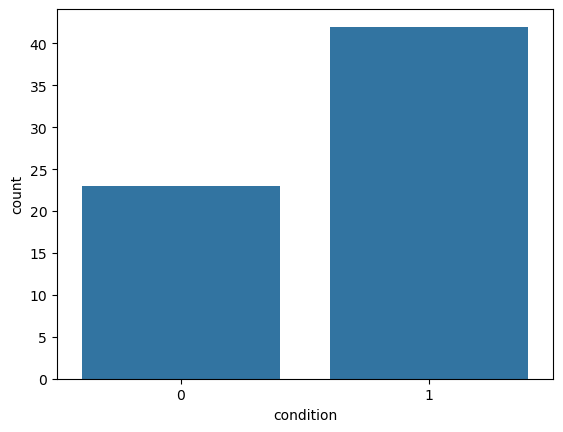

In [46]:
#visualization of the condition variable
sns.countplot(x = 'condition', data=df)

### variable: gender

In [47]:
df['gender'].value_counts(sort=False)

gender
2.0    17
1.0    48
Name: count, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

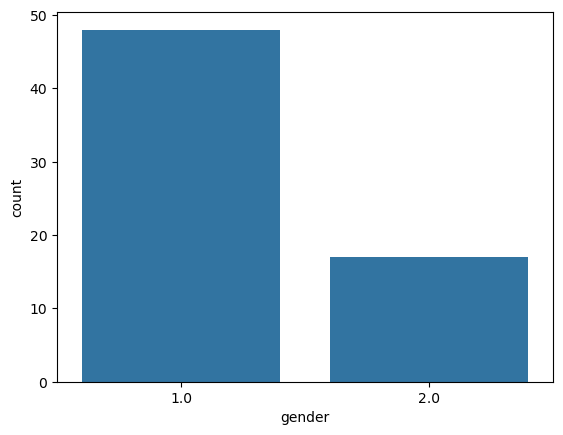

In [48]:
#visualization
sns.countplot(x = 'gender', data=df)

### variable: Age

In [49]:
df['age'].describe()

count    65.000000
mean     29.200000
std      16.685697
min      18.000000
25%      20.000000
50%      21.000000
75%      23.000000
max      74.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

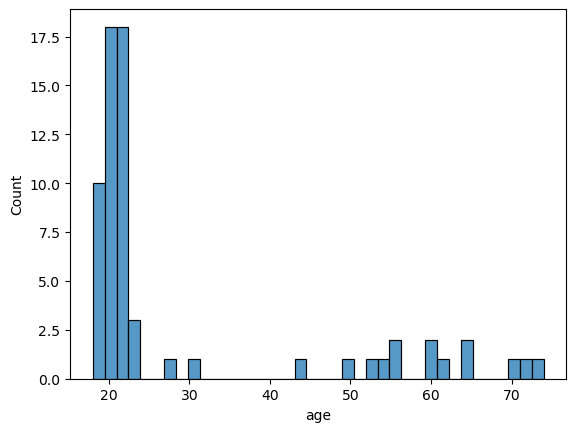

In [50]:
sns.histplot(x = 'age', data=df)

The histogram shows clearly how most participants were aged below 25 years old, even if the mean age is 29.

### variable: education

In [51]:
df['education'].value_counts(sort=False)

education
2.0    40
4.0    14
3.0     1
5.0     9
1.0     1
Name: count, dtype: int64

<Axes: xlabel='education', ylabel='count'>

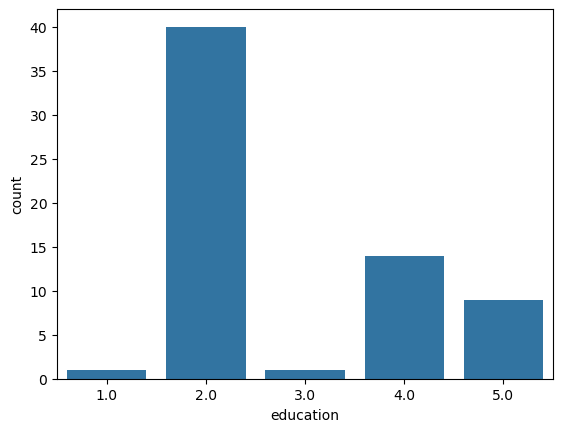

In [52]:
#visualization
sns.countplot(x = 'education', data=df)

Most participants replied 2, meaning that their highest level of education was highschool.

## Manipulation Check

### Manipulation check for the scale question ("The recommender took time to generate results", 1-7 likert scale)

In [53]:
df['mancheck2'].describe()

count    65.000000
mean      3.953846
std       1.874423
min       1.000000
25%       2.000000
50%       4.000000
75%       6.000000
max       7.000000
Name: mancheck2, dtype: float64

In [54]:
(label1, values1), (label2, values2) = df.groupby('condition')['mancheck2']

testresult = pg.ttest(values1, values2)

print(f"We compare {label1} (M={np.mean(values1):.2f}, SD={np.std(values1):.3f}) "
     f"with {label2} (M={np.mean(values2):.2f}, SD={np.std(values2):.3f}), "
     f"t({testresult.iloc[0,1]})={testresult.iloc[0,0]:.3f}, "
     f"p={testresult.iloc[0,3]:.4f}.")

testresult

We compare 0 (M=3.65, SD=1.902) with 1 (M=4.12, SD=1.815), t(43.21900774469187)=-0.944, p=0.3506.


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.943544,43.219008,two-sided,0.350648,"[-1.46, 0.53]",0.248922,0.382,0.156906


The manipulation check was not passed.

### Manipulation check for yes-no question ("There was a loading bar")

In [55]:
df['mancheck1'].value_counts()

mancheck1
1.0    46
0.0    19
Name: count, dtype: int64

In [56]:
mycrosstab = pd.crosstab(df['mancheck1'], df['condition'])
mycrosstab

condition,0,1
mancheck1,,
0.0,11,8
1.0,12,34


In [57]:
# and then get the chi2 test for that table
c, p, dof, expected = contingency.chi2_contingency(mycrosstab)
print(f"𝜒²({dof:.0f}) = {c:.3f}, p = {p:.3f} ")

# maybe Cramer's V as well?
print(f"V = {contingency.association(mycrosstab,method='cramer'):.3f}")

𝜒²(1) = 4.640, p = 0.031 
V = 0.303


The manipulation check was passed.

## Constructing the scales needed for the DV and mediator

### DV: Satisfaction

In [58]:
#factor analysis satisfaction
items = df[[ 'satisfaction_1', 'satisfaction_2', 'satisfaction_3',
       'satisfaction_4', 'satisfaction_5', 'satisfaction_6']]

#CHECK ADEQUACY
#Bartlett
#p-value should be 0 (statistically sig.)
chi_square_value,p_value=calculate_bartlett_sphericity(items)
print(chi_square_value, p_value)

#KMO
#Value should be 0.6<
kmo_all,kmo_model=calculate_kmo(items)
print(kmo_model)

399.98733503910046 6.959875111353427e-76
0.8775137404282375


The p-value is very close to zero and the KMO measure is above the threshold of 0.6. This indicates that the sample is adequate for factor analysis.

In [59]:
# performing the factor analysis using the FactorAnalyzer class. Extracting 1 factor
fa = FactorAnalyzer(n_factors = 1)

# fit the factor analysis model to your data
fa.fit(df[['satisfaction_1', 'satisfaction_2', 'satisfaction_3',
       'satisfaction_4', 'satisfaction_5', 'satisfaction_6']])

/Users/matilde/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/factor_analyzer/factor_analyzer.py:663: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(


FactorAnalyzer(n_factors=1, rotation_kwargs={})

In [60]:
# Get the factor loadings
loadings = fa.loadings_

loadings

array([[-0.8232612 ],
       [-0.86142981],
       [-0.92122235],
       [-0.85951818],
       [-0.88618287],
       [-0.91419831]])

In [61]:
# Get the communalities
communalities = fa.get_communalities()

communalities

array([0.677759  , 0.74206132, 0.84865062, 0.7387715 , 0.78532007,
       0.83575856])

In [62]:
# Get the eigenvalues

eigenvalues = fa.get_eigenvalues()

np.round(eigenvalues, decimals = 2)

array([[ 4.85,  0.48,  0.23,  0.18,  0.15,  0.09],
       [ 4.63,  0.22,  0.02, -0.02, -0.07, -0.15]])

In [63]:
# Get the variance explained by each factor;  

variance_explained = fa.get_factor_variance()

variance_explained

(array([4.62832107]), array([0.77138684]), array([0.77138684]))

In [64]:
# Calculate the initial Cronbach's alpha
pg.cronbach_alpha(items)

(0.951866315985229, array([0.931, 0.968]))

The Cronbachs' alpha is high. 

In [65]:
# calculate the alpha value without each item
alpha_deleted_items = []
for item in items.columns:
    reduced_data = items.drop(item, axis=1)
    alpha = pg.cronbach_alpha(reduced_data)
    alpha_deleted_items.append((item, alpha))

for item, alpha in alpha_deleted_items:
    print("Item removed:", item)
    print("Cronbach's alpha:", alpha)
    print()

Item removed: satisfaction_1
Cronbach's alpha: (0.9484138048076807, array([0.926, 0.966]))

Item removed: satisfaction_2
Cronbach's alpha: (0.944693844785852, array([0.92 , 0.963]))

Item removed: satisfaction_3
Cronbach's alpha: (0.9377523772306893, array([0.91 , 0.959]))

Item removed: satisfaction_4
Cronbach's alpha: (0.9442131902036031, array([0.919, 0.963]))

Item removed: satisfaction_5
Cronbach's alpha: (0.9419299912885088, array([0.916, 0.962]))

Item removed: satisfaction_6
Cronbach's alpha: (0.9393453503374355, array([0.912, 0.96 ]))



As the Cronbach's alpha is already high, it was decided to maintain all items for computing the meanscale.

In [66]:
#mean scale satisfaction
df['satisfaction'] = df[['satisfaction_1', 'satisfaction_2', 'satisfaction_3',
       'satisfaction_4', 'satisfaction_5', 'satisfaction_6']].mean(axis=1)   # of course, only select those you're interested in

In [67]:
df.head()

,userid,satisfaction_1,satisfaction_2,satisfaction_3,satisfaction_4,satisfaction_5,satisfaction_6,credibility_1,credibility_2,credibility_3,...,prolific,timestart,genre,consent,mancheck1,mancheck2,calibrationid,recommendationid,_merge,satisfaction
0,599,4,2,2,2,2.0,2.0,4.0,2.0,2.0,...,https://recipe-study.wur.nl/gr,2024-06-21 14:06:27,3.0,1.0,0.0,2.0,683.0,2017.0,both in master and using data,2.333333
1,600,7,7,7,7,7.0,7.0,5.0,5.0,5.0,...,https://recipe-study.wur.nl/gr,2024-06-21 14:29:48,1.0,1.0,0.0,4.0,769.0,1841.0,both in master and using data,7.000000
2,601,4,4,4,4,4.0,4.0,7.0,7.0,7.0,...,https://recipe-study.wur.nl/gr,2024-06-21 14:33:58,1.0,1.0,1.0,4.0,305.0,304.0,both in master and using data,4.000000
3,602,6,7,6,5,5.0,7.0,7.0,4.0,5.0,...,https://recipe-study.wur.nl/gr,2024-06-21 14:35:16,1.0,1.0,1.0,4.0,417.0,418.0,both in master and using data,6.000000
4,603,6,7,7,7,6.0,7.0,6.0,7.0,7.0,...,https://recipe-study.wur.nl/gr,2024-06-21 14:39:19,1.0,1.0,1.0,3.0,1277.0,1276.0,both in master and using data,6.666667


In [68]:
df.satisfaction.describe()

count    65.000000
mean      5.710256
std       1.228028
min       1.000000
25%       5.166667
50%       6.000000
75%       6.666667
max       7.000000
Name: satisfaction, dtype: float64

Participants scored on average 5.71 , meaning that their satisfaction is higher than the scale mid-point.

<Axes: xlabel='satisfaction', ylabel='Count'>

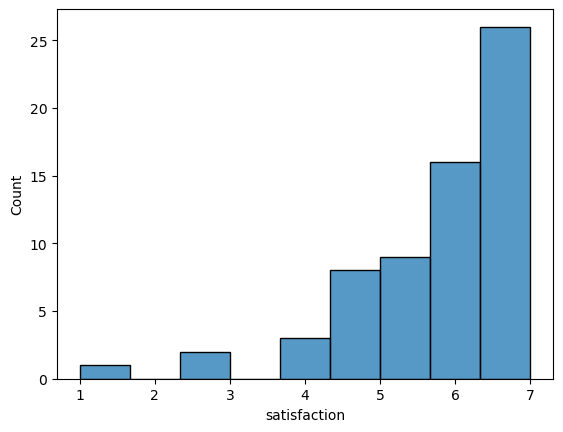

In [69]:
sns.histplot(x = 'satisfaction', data=df)

### Mediator: Trust

In [70]:
items2 = df[['credibility_6', 'credibility_7', 'credibility_8', 'credibility_9',
       'credibility_10', 'credibility_11', 'credibility_12']]

#CHECK ADEQUACY
#Bartlett
#p-value should be 0 (statistically sig.)
chi_square_value,p_value=calculate_bartlett_sphericity(items2)
print(chi_square_value, p_value)

#KMO
#Value should be 0.6<
kmo_all,kmo_model=calculate_kmo(items2)
print(kmo_model)

195.46522093864286 2.8196728061025052e-30
0.7801584680614011


The p-value is extremely small and the KMO value is well above the threshold of 0.6, indicating that the sample is adequate for factor analysis.

In [71]:
# performing the factor analysis using the FactorAnalyzer class. Extracting 1 factor.
fa = FactorAnalyzer(n_factors = 1)

# fit the factor analysis model to your data
fa.fit(df[['credibility_6', 'credibility_7', 'credibility_8', 'credibility_9',
       'credibility_10', 'credibility_11', 'credibility_12']])

/Users/matilde/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/factor_analyzer/factor_analyzer.py:663: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(


FactorAnalyzer(n_factors=1, rotation_kwargs={})

In [72]:
# Get the factor loadings
loadings = fa.loadings_

loadings


array([[-0.66532575],
       [-0.63013154],
       [-0.65613893],
       [-0.69203186],
       [-0.65116424],
       [-0.66857842],
       [-0.7174611 ]])

In [73]:
# Get the communalities
communalities = fa.get_communalities()

communalities

array([0.44265835, 0.39706576, 0.43051829, 0.4789081 , 0.42401487,
       0.4469971 , 0.51475043])

In [74]:
# Get the eigenvalues

eigenvalues = fa.get_eigenvalues()

np.round(eigenvalues, decimals = 2)

array([[ 3.68,  1.17,  0.68,  0.59,  0.33,  0.32,  0.22],
       [ 3.13,  0.62,  0.13,  0.03, -0.21, -0.23, -0.34]])

In [75]:
# Get the variance explained by each factor;  

variance_explained = fa.get_factor_variance()

variance_explained

(array([3.13491291]), array([0.4478447]), array([0.4478447]))

In [76]:
# Calculate the initial Cronbach's alpha
pg.cronbach_alpha(items2)

(0.8490513316963768, array([0.786, 0.899]))

Cronbach's alpha is above .80, meaning there is high reliability.

In [77]:
# calculate the alpha value without each item
alpha_deleted_items2 = []
for item in items2.columns:
    reduced_data = items2.drop(item, axis=1)
    alpha = pg.cronbach_alpha(reduced_data)
    alpha_deleted_items2.append((item, alpha))

for item, alpha in alpha_deleted_items2:
    print("Item removed:", item)
    print("Cronbach's alpha:", alpha)
    print()

Item removed: credibility_6
Cronbach's alpha: (0.8289350986602664, array([0.755, 0.886]))

Item removed: credibility_7
Cronbach's alpha: (0.8332565291582713, array([0.762, 0.889]))

Item removed: credibility_8
Cronbach's alpha: (0.8297954040919181, array([0.757, 0.887]))

Item removed: credibility_9
Cronbach's alpha: (0.8255684807388788, array([0.751, 0.884]))

Item removed: credibility_10
Cronbach's alpha: (0.8299705935305767, array([0.757, 0.887]))

Item removed: credibility_11
Cronbach's alpha: (0.8287688118102335, array([0.755, 0.886]))

Item removed: credibility_12
Cronbach's alpha: (0.8209122062663186, array([0.744, 0.881]))



As the Cronbach's alpha is already high, it was decided to maintain all items for computing the meanscale.

In [78]:
#mean scale trust
df['trust'] = df[['credibility_6', 'credibility_7', 'credibility_8', 'credibility_9',
       'credibility_10', 'credibility_11', 'credibility_12']].mean(axis=1)   # of course, only select those you're interested in

In [79]:
df.head()

,userid,satisfaction_1,satisfaction_2,satisfaction_3,satisfaction_4,satisfaction_5,satisfaction_6,credibility_1,credibility_2,credibility_3,...,timestart,genre,consent,mancheck1,mancheck2,calibrationid,recommendationid,_merge,satisfaction,trust
0,599,4,2,2,2,2.0,2.0,4.0,2.0,2.0,...,2024-06-21 14:06:27,3.0,1.0,0.0,2.0,683.0,2017.0,both in master and using data,2.333333,2.000000
1,600,7,7,7,7,7.0,7.0,5.0,5.0,5.0,...,2024-06-21 14:29:48,1.0,1.0,0.0,4.0,769.0,1841.0,both in master and using data,7.000000,5.000000
2,601,4,4,4,4,4.0,4.0,7.0,7.0,7.0,...,2024-06-21 14:33:58,1.0,1.0,1.0,4.0,305.0,304.0,both in master and using data,4.000000,7.000000
3,602,6,7,6,5,5.0,7.0,7.0,4.0,5.0,...,2024-06-21 14:35:16,1.0,1.0,1.0,4.0,417.0,418.0,both in master and using data,6.000000,3.714286
4,603,6,7,7,7,6.0,7.0,6.0,7.0,7.0,...,2024-06-21 14:39:19,1.0,1.0,1.0,3.0,1277.0,1276.0,both in master and using data,6.666667,4.285714


In [80]:
df.trust.describe()

count    65.000000
mean      4.597802
std       1.150059
min       1.142857
25%       4.142857
50%       4.714286
75%       5.142857
max       7.000000
Name: trust, dtype: float64

<Axes: xlabel='trust', ylabel='Count'>

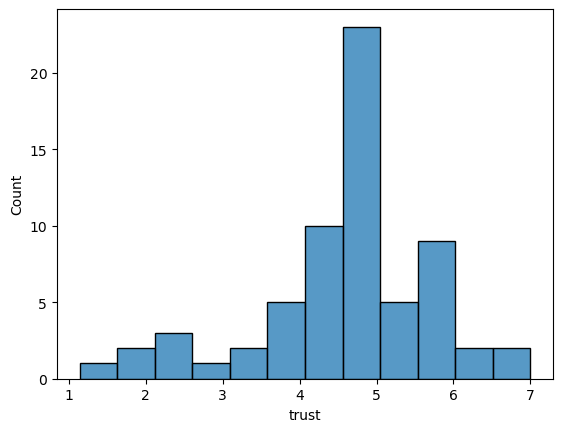

In [81]:
sns.histplot(x = 'trust', data=df)

Participants scored on average 4.60 on trust in the system, which is higher than the scale mid-point.

## Randomization check

### variable: education

In [82]:
#education
#let's look at the crosstab
education_mycrosstab = pd.crosstab(df['education'], df['condition'])
education_mycrosstab

condition,0,1
education,,
1.0,1,0
2.0,14,26
3.0,1,0
4.0,2,12
5.0,5,4


In [83]:
# and then get the chi2 test for that table
c, p, dof, expected = contingency.chi2_contingency(education_mycrosstab)
print(f"𝜒²({dof:.0f}) = {c:.3f}, p = {p:.3f} ")

# Cramer's V 
print(f"V = {contingency.association(education_mycrosstab,method='cramer'):.3f}")

𝜒²(4) = 7.982, p = 0.092 
V = 0.350


There is no significant difference in the distribution of education across the two conditions, randomization check passed.

### variable: gender

In [84]:
#gender
#let's look at the crosstab
gender_mycrosstab = pd.crosstab(df['gender'], df['condition'])
gender_mycrosstab

condition,0,1
gender,,
1.0,15,33
2.0,8,9


In [85]:
# and then get the chi2 test for that table
c, p, dof, expected = contingency.chi2_contingency(gender_mycrosstab)
print(f"𝜒²({dof:.0f}) = {c:.3f}, p = {p:.3f} ")

# Cramer's V 
print(f"V = {contingency.association(gender_mycrosstab,method='cramer'):.3f}")

𝜒²(1) = 0.768, p = 0.381 
V = 0.145


There is no significant difference in the distribution of gender across the two conditions, randomization check passed.

### variable: Age

In [86]:
#age
(label1, values1), (label2, values2) = df.groupby('condition')['age']

testresult = pg.ttest(values1, values2)

print(f"We compare {label1} (M={np.mean(values1):.2f}, SD={np.std(values1):.3f}) "
     f"with {label2} (M={np.mean(values2):.2f}, SD={np.std(values2):.3f}), "
     f"t({testresult.iloc[0,1]})={testresult.iloc[0,0]:.3f}, "
     f"p={testresult.iloc[0,3]:.4f}.")

testresult

We compare 0 (M=31.52, SD=18.443) with 1 (M=27.93, SD=15.277), t(38.38950800495643)=0.781, p=0.4395.


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.781223,38.389508,two-sided,0.439463,"[-5.71, 12.9]",0.214815,0.34,0.128983


There is no significant difference in the distribution of age across the two conditions, randomization check passed.

### variable: reading frequency

In [87]:
#reading frequency
(label1, values1), (label2, values2) = df.groupby('condition')['control(reading_habits)']

testresult = pg.ttest(values1, values2)

print(f"We compare {label1} (M={np.mean(values1):.2f}, SD={np.std(values1):.3f}) "
     f"with {label2} (M={np.mean(values2):.2f}, SD={np.std(values2):.3f}), "
     f"t({testresult.iloc[0,1]})={testresult.iloc[0,0]:.3f}, "
     f"p={testresult.iloc[0,3]:.4f}.")

testresult

We compare 0 (M=4.22, SD=1.768) with 1 (M=4.21, SD=1.641), t(42.192386366028295)=0.007, p=0.9946.


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.006813,42.192386,two-sided,0.994596,"[-0.92, 0.92]",0.001812,0.263,0.050005


There is no significant difference in the distribution of reading frequency across the two conditions, randomization check passed.

### variable: RS familiarity

In [88]:
#recommender system familiarity
(label1, values1), (label2, values2) = df.groupby('condition')['control(previous_experience_with_RS)']

testresult = pg.ttest(values1, values2)

print(f"We compare {label1} (M={np.mean(values1):.2f}, SD={np.std(values1):.3f}) "
     f"with {label2} (M={np.mean(values2):.2f}, SD={np.std(values2):.3f}), "
     f"t({testresult.iloc[0,1]})={testresult.iloc[0,0]:.3f}, "
     f"p={testresult.iloc[0,3]:.4f}.")

testresult

We compare 0 (M=3.65, SD=1.991) with 1 (M=3.57, SD=1.941), t(44.0148213756047)=0.155, p=0.8777.


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.154768,44.014821,two-sided,0.877712,"[-0.97, 1.13]",0.040574,0.266,0.052723


here is no significant difference in the distribution of RS familiarity across the two conditions, randomization check passed.

# Hypothesis testing

## H1
### A recommender system with delayed response latency will result in lower user’s satisfaction than a recommender system with no delay in its response latency
t-test

In [89]:
(label1, values1), (label2, values2) = df.groupby('condition')['satisfaction']

testresult = pg.ttest(values1, values2)

print(f"We compare {label1} (M={np.mean(values1):.2f}, SD={np.std(values1):.3f}) "
     f"with {label2} (M={np.mean(values2):.2f}, SD={np.std(values2):.3f}), "
     f"t({testresult.iloc[0,1]})={testresult.iloc[0,0]:.3f}, "
     f"p={testresult.iloc[0,3]:.4f}.")

testresult

We compare 0 (M=5.68, SD=0.915) with 1 (M=5.73, SD=1.356), t(59.80999242820017)=-0.156, p=0.8763.


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.156373,59.809992,two-sided,0.876265,"[-0.62, 0.53]",0.036387,0.266,0.052189


There was a non-significant difference between the participants of the two conditions in their score on user satisfaction. No support was found for H1

## H2 mediation
### A recommender system with delayed response latency will lead to lower user satisfaction because it reduces trust in the system, compared to a recommender system with no delay in its response latency.
mediation analysis

In [90]:
pg.mediation_analysis(data=df, x='condition', m='trust', y='satisfaction', seed=42, n_boot=1000)

,path,coef,se,pval,CI[2.5%],CI[97.5%],sig
0,trust ~ X,-0.237947,0.299184,0.429413,-0.835819,0.359924,No
1,Y ~ trust,0.527914,0.116938,0.000028,0.294231,0.761596,Yes
2,Total,0.045031,0.321017,0.888889,-0.596471,0.686533,No
3,Direct,0.172360,0.281885,0.543134,-0.391121,0.735841,No
4,Indirect,-0.127329,0.172702,0.442000,-0.610821,0.114802,No


No support was found for H2 but trust in the system significantly affected user satisfaction. 